# K-means algorithm from scratch

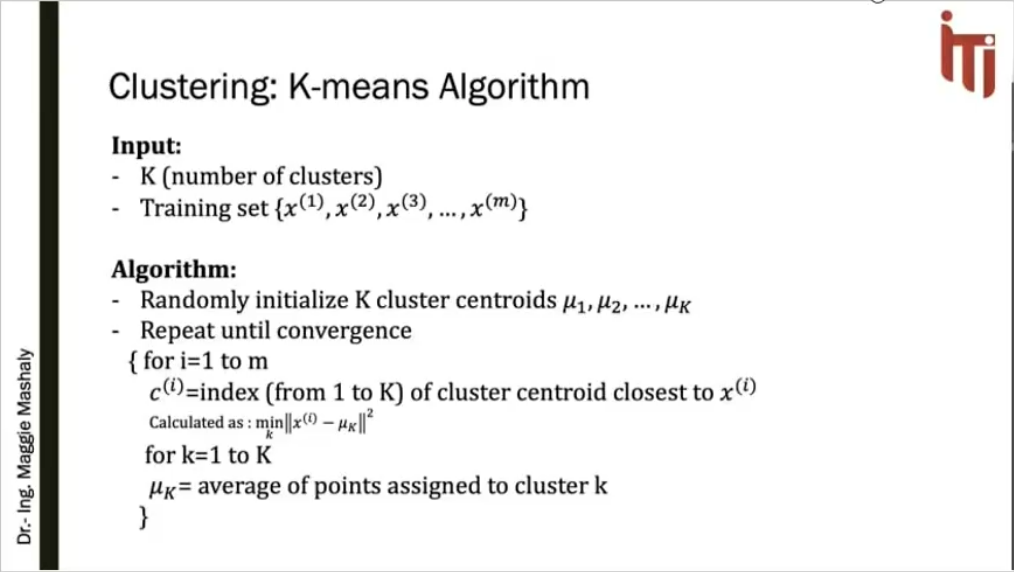

## Input

In [2]:
import numpy as np

# generate random data
def init_random_data(number_clusters = 3, random_seed = 42):
    
    np.random.seed(random_seed)
    
    clusters = []  

    for i in range(number_clusters):
        
        # random center for this cluster
        center_x = np.random.randint(1, 10)
        center_y = np.random.randint(1, 10)
        
        # random spread
        spread = np.random.uniform(0.1, 0.6)
        
        # generate 50 points around the random center
        cluster = np.random.normal(
            loc=[center_x, center_y], 
            scale=spread, 
            size=(50, 2)
        )
        
        clusters.append(cluster)
    
    # stack all clusters into one array
    X = np.vstack(clusters)
    
    return X

X = init_random_data()
X.shape

(150, 2)

## K-means algorithm

In [3]:
def init_centroids (X, k):
    # randomly pick 'k' points to be the starting centroids
    centroids = np.random.choice(X.shape[0], k, replace=False)
    
    return X[centroids]

def update_centroids (X, labels, k):
    # recompute centroids as the mean of all the assigned points per cluster
    centroids = np.array([
        X[labels == i].mean(axis = 0) for i in range(k)
    ])
    
    return centroids

In [4]:
def assign_clusters(X, centroids):
    # assign each point in X to the nearest centroid
    
    # a list that will store the cluster index for each point
    cluster_idx = []  

    # go through every data point
    for point in X:  
        # calculate the distance from this point to each centroid
        distances = []
        
        for center in centroids:
            distance = np.linalg.norm(point - center) 
            distances.append(distance)

        # find the closest centroid (smallest distance)
        nearest_centroid = np.argmin(distances)
        cluster_idx.append(nearest_centroid)

    return np.array(cluster_idx)

In [5]:
def kmeans( X, k, max_iters=100, smallest_movement = 0.0001):
    centroids = init_centroids(X, k)
    
    for i in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        
        # check for convergence
        if np.all( # checks if all centroids moved less than the smallest moving value -> reurns true
            np.abs(new_centroids - old_centroids) < smallest_movement):
            break
        
    return labels, new_centroids

## elbow

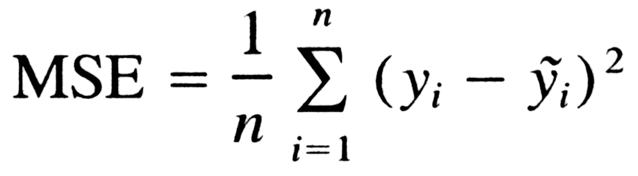

In [6]:
def compute_distortion(X, k, labels, centroids):
    # compute how close points are from thier centroids
    # Sum of Squared errors
    
    total_error = 0.0
    num_points = X.shape[0]
    
    # loop over each cluster
    for i in range(k):
        
        # get all the points that belong to cluster i
        cluster_points = X[labels == i]

        # calculate the distance of each point to the centroid
        distances = []
        for point in cluster_points:
            distance = np.linalg.norm(point - centroids[i]) 
            distances.append(distance ** 2) # squared distance

        # add this cluster's squared distances to the total
        total_error += sum(distances)
        
    distortion = total_error / num_points

    return distortion

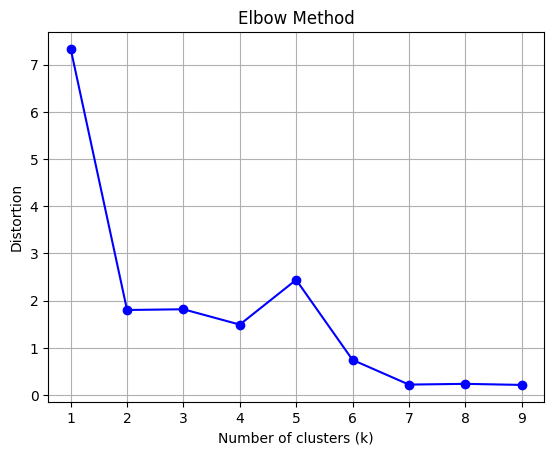

In [16]:
import matplotlib.pyplot as plt

distortion = []
K = range(1, 10)
X = init_random_data(random_seed= 123)

for k in K:
    labels, centroids = kmeans(X, k)
    distortion.append(compute_distortion(X, k, labels, centroids))

plt.plot(K, distortion, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Distortion")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

## evaluate

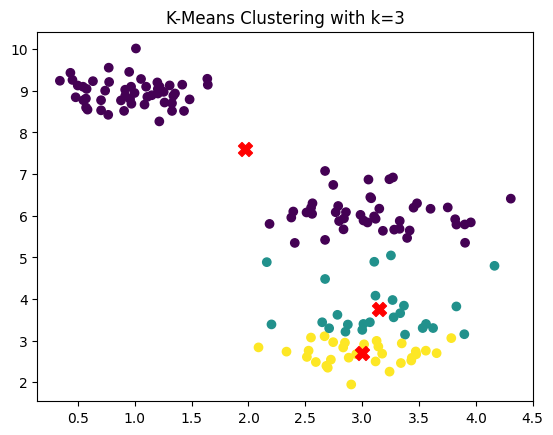

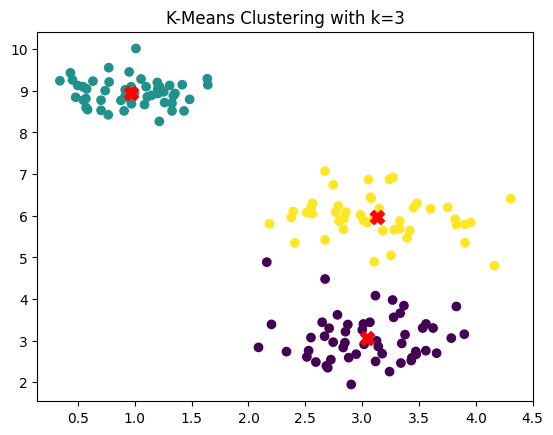

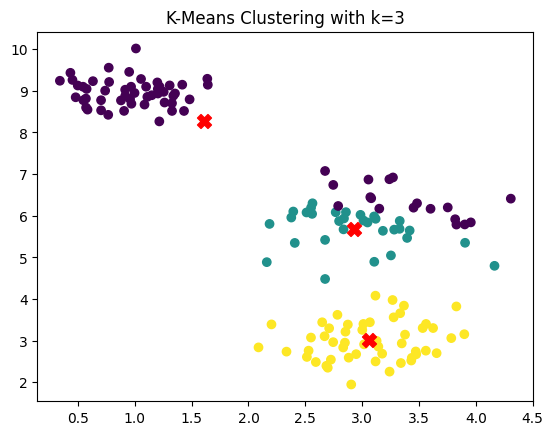

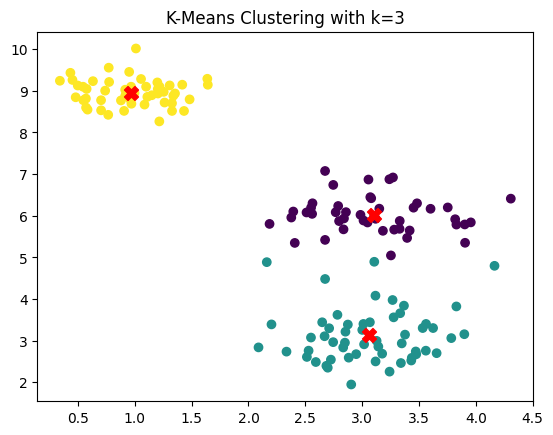

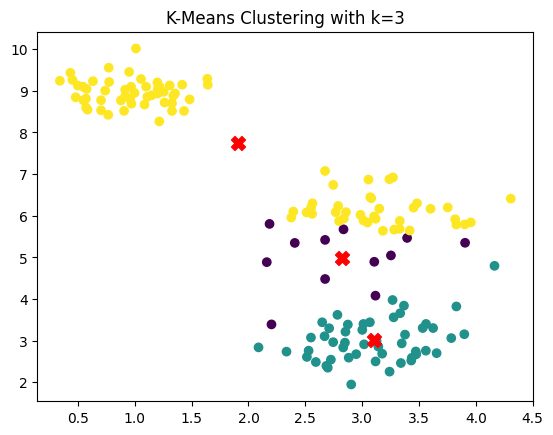

In [17]:
for i in range(5):

    k = 3

    labels, centroids = kmeans(X, k, max_iters=1000)

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X')
    plt.title(f"K-Means Clustering with k={k}")
    plt.show()
